# Sheet 1 - Practical Exercise
The datasets we will be using throughout the practical exercises of this course are subsets of the *FIFA 20 complete player dataset* from kaggle.com, which is extracted from the latest edition of FIFA, a football simulation game. In this dataset the player's attributes like personal data (e.g. Nationality, Club, Age, Value, …) and performances (e.g. Agression, Agility, Overall, Potential, …) are collected. (See [FIFA 20 complete player dataset](https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset?select=players_20.csv) for details.)

For the individual tasks we provide you with preprocessed data.

Before we start with the actual exercises make sure that you have imported all packages that you need, and loaded the dataset.

In [2]:
import numpy as np
import pandas as pd
import timeit

## Exercise 1


First create a smaller Dataframe containing only the columns relevant for the coming exercises. These columns are:
- ``short_name``
- ``age``
- ``club``
- ``overall``
- ``potential``
- ``value_eur``
- ``wage_eur``
- ``team_position``

In [3]:
fifa_20 = pd.read_csv("fifa_20.csv")
smaller_fifa_df = fifa_20[['short_name','age','club','overall','potential','value_eur','wage_eur','team_position']]
smaller_fifa_df.head()

,short_name,age,club,overall,potential,value_eur,wage_eur,team_position
0,L. Messi,32,FC Barcelona,94,94,95500000,565000,RW
1,Cristiano Ronaldo,34,Juventus,93,93,58500000,405000,LW
2,Neymar Jr,27,Paris Saint-Germain,92,92,105500000,290000,CAM
3,J. Oblak,26,Atlético Madrid,91,93,77500000,125000,GK
4,E. Hazard,28,Real Madrid,91,91,90000000,470000,LW


Next write a scaler to scale the values of a column to an interval between a new minimum and maximum value.  
It should use the following signature:

_Hint: Do **not** use a loop over all entries of the column! What other ways are there to manipulate columnar data?_

In [4]:
def my_scaler(column,min_val,max_val):
    max_val_old = column.max()
    min_val_old = column.min()
    column_std = (max_val - min_val)/(max_val_old - min_val_old)
    scaled_column = column_std * (column - min_val_old) + min_val
    return scaled_column

To achieve this your scaler can implement the formula:  
$$\frac{max_{new}-min_{new}}{max_{old}-min_{old}}\cdot (v-min_{old})+min_{new}$$
where $max_{new}$ and $min_{new}$ are the new boundaries of the values, $max_{old}$ and $min_{old}$ are the old boundaries and $v$ is a value from the column that will be scaled.

* Now use your scaler on the column ``value_eur`` and scale it to an interval between $0$ and $100$.  
* Then take the new values for the ``value_eur`` und turn them into discrete values. If a player is below $25$ he should be categorized as ``low``, between $25$ and $50$ he should be categorized as ``low_average`` then between $50$ and $75$ as ``high_average`` and finally any that are above $75$ should be categorized as ``high``.  
* Finally create a histogram to show the distribution of the players' value.

In [5]:
scaled_value_eur = my_scaler(smaller_fifa_df['value_eur'], 0, 100)
print (scaled_value_eur)

0         90.521327
1         55.450237
2        100.000000
3         73.459716
4         85.308057
            ...    
18273      0.037915
18274      0.037915
18275      0.037915
18276      0.037915
18277      0.037915
Name: value_eur, Length: 18278, dtype: float64


In [6]:
discrete_value_eur = pd.cut(scaled_value_eur, bins=4, labels=['low','low_average','high_average', 'high' ], right=False)
print(discrete_value_eur)

0                high
1        high_average
2                high
3        high_average
4                high
             ...     
18273             low
18274             low
18275             low
18276             low
18277             low
Name: value_eur, Length: 18278, dtype: category
Categories (4, object): [low < low_average < high_average < high]


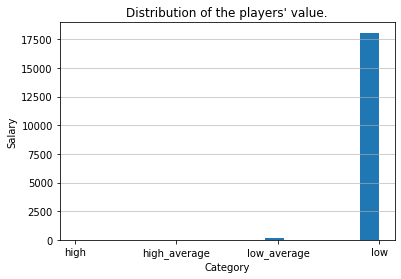

In [7]:
import matplotlib.pyplot as plt

# An "interface" to matplotlib.axes.Axes.hist() method
_ = plt.hist(discrete_value_eur, bins='auto')  # arguments are passed to np.histogram, 
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Category')
plt.ylabel('Salary')
plt.title("Distribution of the players' value.")
plt.Text(0.5, 1.0, "Distribution of the players' value.")
plt.show()

## Exercise 2

Create a new column called ``leftover-potential`` which shows the difference between the value of ``overall`` and the value of ``potential``, to show how much more a given player can still grow.

In [10]:
smaller_fifa_df.loc[:,("leftover-potential")] = smaller_fifa_df.loc[:,("potential")] - smaller_fifa_df.loc[:, ("overall")]

Next create a histogram that shows how often how much potential is still left over.

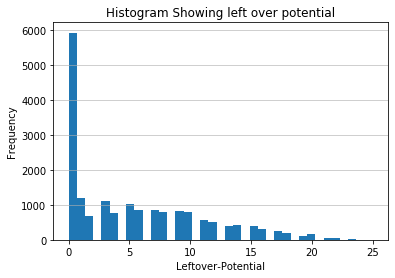

In [87]:
_ = plt.hist(smaller_fifa_df["leftover-potential"], bins='auto')  # arguments are passed to np.histogram, 
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Leftover-Potential')
plt.ylabel('Frequency')
plt.title("Histogram Showing left over potential")
plt.Text(0.5, 1.0, "Histogram Showing left over potential")
plt.show()

## Exercise 3

Group the players by the club they are playing for. Then calculate the average of the ``overall`` column for each team.  

In [127]:
group_by_club = smaller_fifa_df.groupby('club').agg(overall_mean =('overall', 'mean'))
print(group_by_club)

                       overall_mean
club                               
 SSV Jahn Regensburg      64.680000
1. FC Heidenheim 1846     65.793103
1. FC Kaiserslautern      63.750000
1. FC Köln                71.612903
1. FC Magdeburg           64.333333
...                             ...
Zagłębie Lubin            61.600000
Çaykur Rizespor           67.608696
Örebro SK                 60.814815
Östersunds FK             60.851852
Śląsk Wrocław             57.000000

[698 rows x 1 columns]


Then print the five Teams with the highest as well as the five teams with the lowest average ``overall`` value, so we can see which teams are the strongest and which teams are the weakest.

In [139]:
teams_strength = group_by_club.sort_values('overall_mean', ascending= False)
print("Strongest Teams are:")
print (teams_strength.head(5))
print(" ")
print("Weakest Teams are:")
print (teams_strength.tail(5))

Strongest Teams are:
                   overall_mean
club                           
FC Bayern München     81.304348
Real Madrid           80.121212
Juventus              80.060606
Uruguay               78.608696
FC Barcelona          78.363636
 
Weakest Teams are:
                  overall_mean
club                          
Bolton Wanderers     56.086957
Waterford FC         55.850000
Crewe Alexandra      55.800000
Finn Harps           55.280000
UCD AFC              53.428571


Next determine the sum of the ``wages`` of each team. Print the five teams with the highest total ``wages`` and the five teams with the lowest total ``wages``, but only those that spend more than 0€ in total.

In [151]:
sum_of_wages_of_teams = smaller_fifa_df.groupby('club').agg(wages_sum =('wage_eur','sum'))
print(sum_of_wages_of_teams)

                       wages_sum
club                            
 SSV Jahn Regensburg      103000
1. FC Heidenheim 1846     151000
1. FC Kaiserslautern       45000
1. FC Köln                539000
1. FC Magdeburg            46000
...                          ...
Zagłębie Lubin             39000
Çaykur Rizespor           149000
Örebro SK                  38000
Östersunds FK              34000
Śląsk Wrocław               1000

[698 rows x 1 columns]


In [156]:
club_wise_wages = sum_of_wages_of_teams[sum_of_wages_of_teams['wages_sum'] != 0].sort_values('wages_sum', ascending= False)
print("Greatest Spenders are:")
print (club_wise_wages.head(5))
print(" ")
print("Lowest Spenders are:")
print (club_wise_wages.tail(5))

Greatest Spenders are:
                   wages_sum
club                        
Real Madrid          5354000
FC Barcelona         4950000
Manchester City      3984000
Juventus             3750000
Manchester United    2874000
 
Lowest Spenders are:
                            wages_sum
club                                 
Wellington Phoenix               4000
Seongnam FC                      1000
GIF Sundsvall                    1000
US Orléans Loiret Football       1000
Śląsk Wrocław                    1000


Do the greatest spenders and strongest teams match up? What about the lowest spenders and the weakest teams?